<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Baye's-Rule-and-Definitions" data-toc-modified-id="Baye's-Rule-and-Definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baye's Rule and Definitions</a></span></li><li><span><a href="#Estimating-coin-bias-example" data-toc-modified-id="Estimating-coin-bias-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimating coin bias example</a></span><ul class="toc-item"><li><span><a href="#Analytic" data-toc-modified-id="Analytic-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analytic</a></span></li><li><span><a href="#Numerical-Integration" data-toc-modified-id="Numerical-Integration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Numerical Integration</a></span></li><li><span><a href="#Markov-Chain-Monte-Carlo-(MCMC)" data-toc-modified-id="Markov-Chain-Monte-Carlo-(MCMC)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Markov Chain Monte Carlo (MCMC)</a></span><ul class="toc-item"><li><span><a href="#Metropolis-Hastings-Sampler" data-toc-modified-id="Metropolis-Hastings-Sampler-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Metropolis-Hastings Sampler</a></span><ul class="toc-item"><li><span><a href="#Metropolis-Hastings-Criteria" data-toc-modified-id="Metropolis-Hastings-Criteria-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Metropolis-Hastings Criteria</a></span></li></ul></li><li><span><a href="#(optional)-Gibbs-Sampler" data-toc-modified-id="(optional)-Gibbs-Sampler-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>(optional) Gibbs Sampler</a></span></li><li><span><a href="#(optional)-Slice-Sampler" data-toc-modified-id="(optional)-Slice-Sampler-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>(optional) Slice Sampler</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
%precision 4
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import numpy as np
import scipy.stats as st

In [3]:
np.random.seed(0)

## Baye's Rule and Definitions

Recall that the fundamental objective of Bayesian data analysis is to compute the posterior distribution,

$$p(\theta | X) = \frac{p(X|\theta)p(\theta)}{p(X)}$$

or equivalently,

$$p(H_i|D,I) = \frac{p(H_i|I)p(D|H_i,I)}{p(D|I)}$$

Here,
- $H_i$: a proposition that a hypothesis is true
- $I$: A proposition that represents our **prior information**, the information needed to describe the setup of the problem.
- $D$: A proposition representing the data

While the subscript _i_ in $H_i$ assumes a discrete **hypothesis space**, it is of course posible to consider a continuous or a multi-dimensional one. In the case of continuous space, i.e. $p(H_0|D,I)$, it is interpreted as the **probability density function (PDF)**. In any case, our goal is the assign the reasonble valyes of probabilities to the set of $p(H_i)$ or $p(H_0)dH$. Depending on whether the hypothesis space is discrete of continuous, the appropriate normalization condition $\sum_i p(H_i)=1$ or $\int dH_0 p(H_0)=1$ is adopted.

Summarizing the meaning of each probability above,
- $p(D|H_i|I)$: **likelihood function** the probability we obtain the data _D_ assuming that $H_i$ and $I$ are true. We may also express this as $\mathcal{L}(H_i)$.
- $p(H_i|I)$ : **prior probability of hypothesis** The probability that $H_i$ is true, evaluated on the basis of the prior knowledge _I_ alone. That represents our state of knowledge (or ignorance) before we obtain the data.
- $p(H_i|D,I)$: **posterior distribution** The probability that $H_i$ is true after the data is added to the prior knowledge; this is what we seek for. In short, Bayeisan inference is a procedure of how we incorporate the information from the data into $p(H_i|I)$ to obtain the posterior distribution.
- $p(D|I)$ This is a normalization constant and equal to $\sum_i (H_i|I)p(D|H_i,I)$ if $\sum_i p(H_i|D,I) = 1$ is assumed.

The evaluation of which introduces computational issues. There are many ways to address this, including:

- In cases with conjugate priors (with conjugate priors, the posterior has the same distribution as the prior), we can get closed form solutions
- We can use numerical integration
- We can approximate the functions used to calculate the posterior with simpler functions and show that the resulting approximate posterior is “close” to true posteiror (variational Bayes)
- We can use Monte Carlo methods, of which the most important is Markov Chain Monte Carlo (MCMC)

## Estimating coin bias example

Here we will use a toy example estimating the bias of a coin given a sample consisting of _n_ tosses to illustrate a few of the afforementioned approaches.

### Analytic

If we assume a beta distribution for the prior, then the posterior distribution has a closed form solution. This is shown in the example below. A general outline:
- We need to choose a prior distribution family (i.e. the beta here) as well as its parameters (here a=10, b=10).
    - The prior distribution may be relatively uninformative (i.e. more flat) or informative (i.e. more peaked).
- The posterior depends on both the prior and the data.
    - As the amount of data becomes large, the posterior approximates the MLE.
    - An informative prior takes more data to shift than an uninformative one.
- Of course, it is also important the model used (i.e. the likelihood) is appropriate for the fitting the data.
- The mode of the posterior distribution is known as the maximum a posteriori (MAP) estimate (cf MLE which is the mode of the likelihood).


In [4]:
n = 100.0
h = 61.0
p = h/n
rv = st.binom(n, p)
mu = rv.mean()

a = b = 10.0
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)

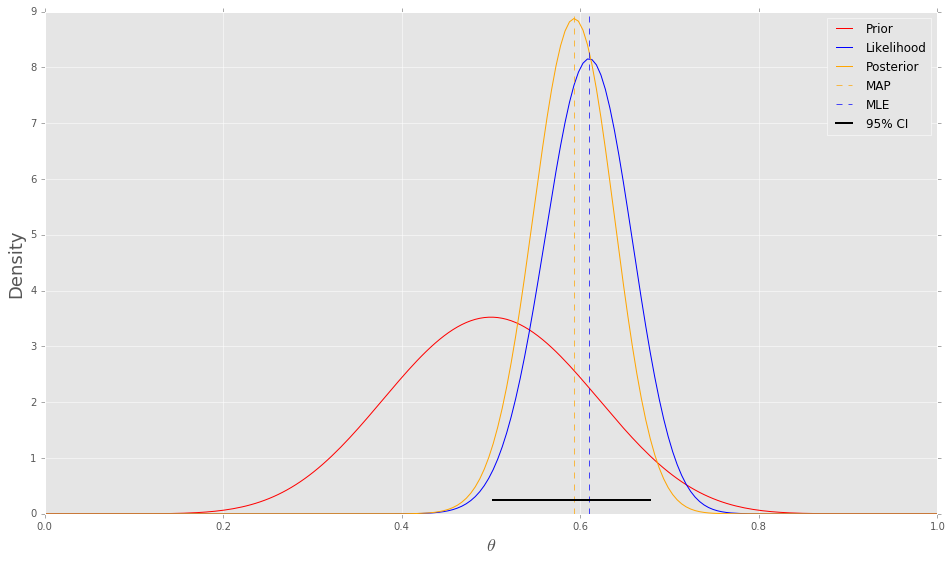

In [5]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca()

ax.plot(thetas, prior.pdf(thetas), c='red', 
        label='Prior')
ax.plot(thetas, n*st.binom(n, thetas).pmf(h), 
        c='blue', label='Likelihood')
ax.plot(thetas, post.pdf(thetas), c='orange', 
        label='Posterior')

ax.axvline((h+a-1.0)/(n+a+b-2.0), color='orange', 
           linestyle='dashed', alpha=0.7, label='MAP')

ax.axvline(mu/n, color='blue', linestyle='dashed', 
           alpha=0.7, label='MLE')
ax.set_xlim([0, 1])
ax.axhline(0.25, ci[0], ci[1], c='black', linewidth=2, 
           label='95% CI');

ax.set_xlabel(r'$\theta$', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
plt.legend();

### Numerical Integration

One simple way of numerical integration is to estimate the values on a grid of values for $\theta$. To calculate the posterior, we find the prior and the likelhood for each value of $\theta$, and for the marginal likelhood, we replace the integral with the equivalent sum,
$$p(X) = \sum_{\theta_i} p(X|\theta_i)p(\theta_i)$$

One advantage of this is that the prior does not have to be a conjugate, and so we are not restricted in our chouce of an appropriate prior distribution. For example, the prior can be a mixutre distribution or estimated empirically from data. The disadvantage is that this is computational expensive when we need to estimate multiple parameters, since the number of grid points grows as $\mathcal{O}(n^d)$, where _n_ defines the grid resolution and _d_ is the size of $\theta$.

In [6]:
prior = st.beta(a, b)
post = prior.pdf(thetas) * st.binom(n, thetas).pmf(h)

post /= (post.sum() / len(thetas))

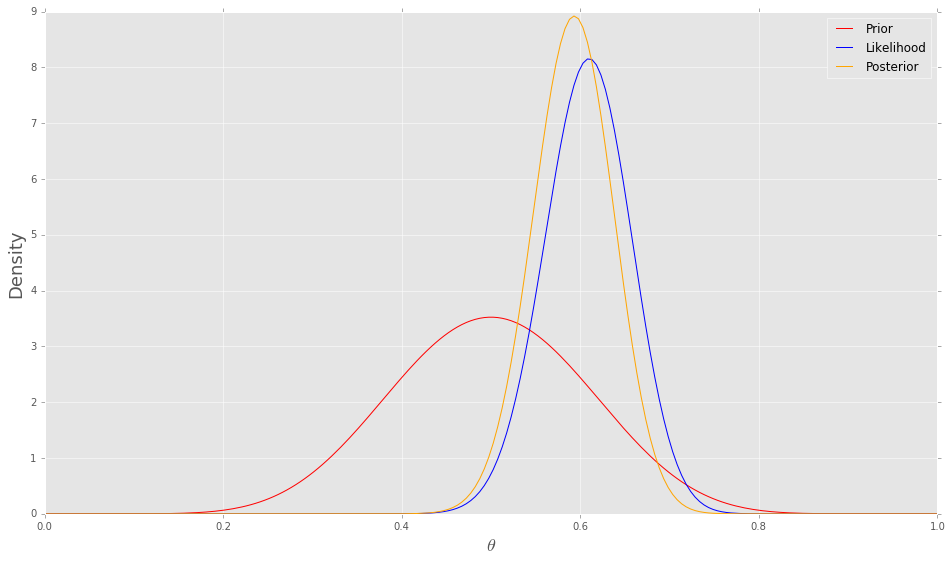

In [7]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca()

ax.plot(thetas, prior.pdf(thetas), c='red', 
        label='Prior')
ax.plot(thetas, n*st.binom(n, thetas).pmf(h), 
        c='blue', label='Likelihood')
ax.plot(thetas, post, c='orange', 
        label='Posterior')

ax.set_xlim([0, 1])

ax.set_xlabel(r'$\theta$', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
plt.legend();

### Markov Chain Monte Carlo (MCMC)

We will only cover the basic ideas of MCMC and Metropolis-Hastings--and Gibbs and slice sampling if we have time. All code will be built from the ground up to illustrate what is involved in fitting an MCMC model, but only toy examples will be shown since the goal is conceptual understanding. **More realiztic computational examples will be shown later using the _pymc_ package.**--need to add this section.

In Bayesian statistics, we want to estiamte the posterior distribution, but this is often intractable due to the high-dimensional integral in the denominator (marginal likelihood). Recall from Monte Carlo integration, we can approximate the posterior $p(\theta|X)$ if we can somehow draw many samples that come from that posterior distribution. With "vanilla" Monte Carlo integration, we need the samples to be independant draws from the posterior distribution, which is a problem if we do not actually know what the posterior distribution is (because we cannot integrate the marginal likelihood).

With MCMC, we use a random variable to generate a Markov chain in the parameter space, whose _i_+1-th value depends only on the _i_-th one. Under certain conditions, see below, the Markov chain will have a unique stationary distribution. In addition, not all samples are used--instead we set up acceptance criteria for each draw based on comparing successive states with respect to a target distribution that ensure that the stationary distribution is the posterior distribution on interest. The credible intervals can be obtained by creating a histogram and by counting the muber of samples in an appropriate region. The nice thing is that this target distribution only needs to be proportional to the posterior distribution, which means we don't need to evaluate the potentially difficult marginal likelihood, which is just a normalizing constant. We can find such a target distribution easily, since _posterior_ $\propto$ _likelihood_ _X_ _prior_. After some time, the Markov chain of accepted draws will converge to the stationary distribution, and we can use those samples as (correlated) draws from the posterior distribution, and find functions of the posterior distribution in the same way as for vanilla Monte Carlo integration.

#### Metropolis-Hastings Sampler

To carry out the Metropolis-Hastings random walk algorithm, we need to draw random samples from the following distributions
- the standard uniform distribution
- a proposal distribution $p(x)$ that we choose to be $\mathcal{N}(0,\sigma)$
- the target distribution $g(x)$ which is proportional to the posterior probability

Given an initial guess for $\theta$ with positive probability of being drawn, the Metropolis-Hastings algorithm proceeds as follows
- Choose a new proposed value ($\theta_p$) such that $\theta_p=\theta+\Delta\theta$ where $\Delta\theta \sim \mathcal{N}(0,\sigma)$
- calculate the ratio
$$\rho = \frac{g(\theta_p | X)}{g(\theta | X)}$$
where g is the posterior probability
- If the proposal distribution is not symmetrical, we need to weight the acceptence probability to maintain detailed balanace (reversibility) of the stationary distribution, and instead calculate
$$\rho = \frac{g(\theta_p|X)p(\theta|\theta_p)}{g(\theta|X)p(\theta_p|\theta)}$$

Since we are taking ratios, the denominator cancels any distribution proportional to _g_ will also work. So we can use,

$$\rho=\frac{p(X|\theta_p)p(\theta_p)}{p(X|\theta)p(\theta)}$$

- if $\rho \ge 1$, then $\theta=\theta_p$
- if $\rho < 1$, then set $\theta=\theta_p$ with probability $\rho$ otherwise set $\theta=\theta$ (this is where we use the standard uniform distribution)
- Repeat the earlier steps

**In summary**:
- Randomly generate the candidate of the _i_+ 1-th value $\theta_p$, using an appropriate probability distribution (e.g. Gaussian) $q(\theta_p; \theta)$
- Accept the proposed state $\theta_p$ with the probability $\rho$ and update $\theta_{i+1}=\theta_p$. Otherwise, we chose $\theta_{i+1}=\theta_i$. The acceptance probability is determined by,

$$\rho(\theta_p;\theta) = min\left[1, \frac{p(\theta_p|D)q(\theta_i;\theta_p)}{p(\theta_i|D)q(\theta_p;\theta_i)}\right] = min\left[1, \frac{p(D|\theta_p)p(\theta_p)q(\theta_i;\theta_p)}{p(D|\theta_i)p(\theta_i)q(\theta_p;\theta_i)}\right]$$

where we used the Bayes' theorem in the last equality. Note that $\rho$ can be computed without knowing $p(\theta|D)$.

After some number of iterations _k_ the samples $\theta_{k+1},\theta_{k+2}$,... will be samples from the posterior distributions. Here are initial concepts to help your intuition:


##### Metropolis-Hastings Criteria

The following three conditions are required for the Markov chain generated by the Metropolis-Hastings algorithm to converge to a stationary distribution:
- aperiodic
- irreducible: the chain can eventually reach any state of non-zero probability from any starting point
- positive recurrent: there exists a **stationary distribution** $\pi(\theta)$ such that if the initial value $\theta_0$ is sampled from $\pi(\theta)$, then all the subsequent iterates will follow $\pi(\theta)$

In [8]:
def target(like, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return like(n, theta).pmf(h)*prior.pdf(theta)
    
n = 100.0
h = 61.0
a = b = 10.0
like = st.binom
prior = st.beta(a, b)
sigma = 0.3
naccept = 0.0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta

for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, target(like, prior, n, h, theta_p)
              /target(like, prior, n, h, theta))
    u = np.random.uniform()
    
    if u < rho:
        naccept += 1
        theta = theta_p
    
    samples[i+1] = theta
## nmcmc is motivated in the mh_coin example below
nmcmc = len(samples)//2
print("Efficiency = {}".format(naccept/niters))

Efficiency = 0.1936


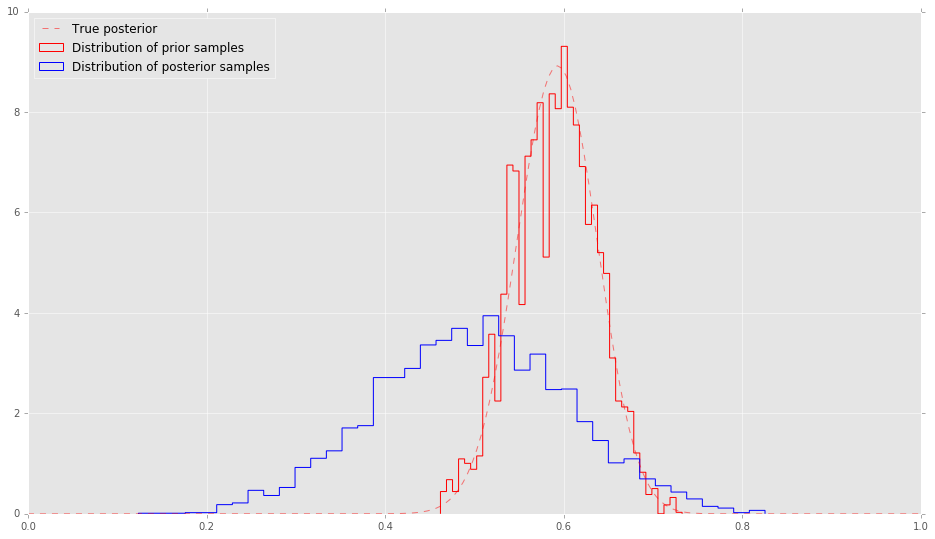

In [9]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

ax.hist(samples[nmcmc:], 40, histtype='step', normed=True,
           color='red', linewidth=1, label='Distribution of prior samples');
ax.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True,
       color='blue', linewidth=1, label='Distribution of posterior samples');
ax.plot(thetas, post, c='red', linestyle='--',
       alpha=0.5, label='True posterior')
ax.set_xlim([0,1])

plt.legend(loc='best');

In [10]:
def mh_coin(niters, n, h, theta, like, prior, sigma):
    samples = np.ones(niters)
    
    for i in range(int(niters)):
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(like, prior, n, h, theta_p)
                 /target(like, prior, n, h, theta))
        u = np.random.uniform()
        
        if u < rho:
            theta = theta_p
        
        samples[i] = theta

    return samples

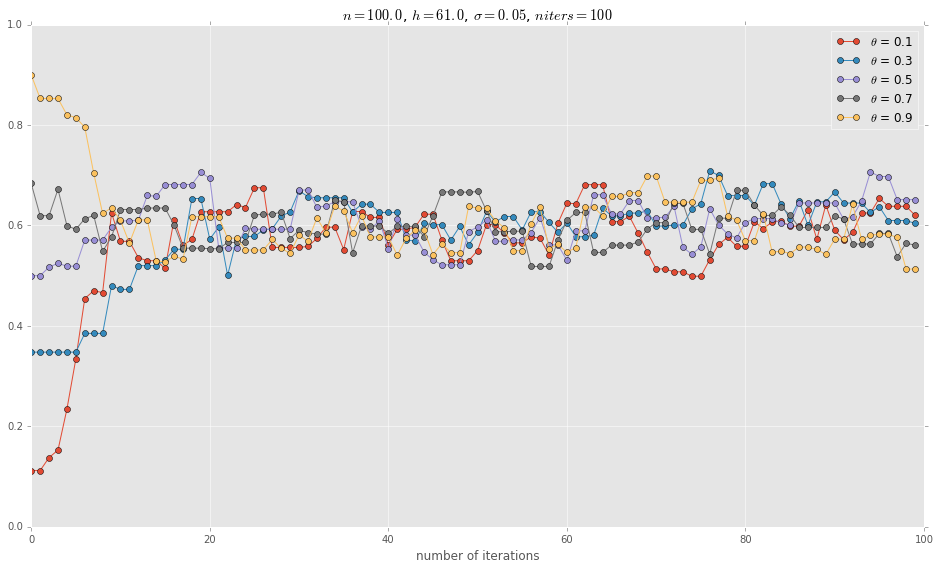

In [11]:
n = 100.0
h = 61.0
like = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

fig = plt.figure(figsize=(16,9))
ax = plt.gca()

for theta in np.arange(0.1, 1.0, 0.2):
    sample = mh_coin(niters, n, h, theta, like, prior, sigma)
    ax.plot(sample, '-o', label=r'$\theta$ = {}'.format(theta))
    
ax.set_xlim([0, niters])
ax.set_xlabel('number of iterations');
ax.set_ylim([0, 1]);
ax.set_title(r'$n = {0}$, $h = {1}$, $\sigma = {2}$, $niters = {3}$'.format(
            n, h, sigma, niters))
plt.legend(loc='best');

#### (optional) Gibbs Sampler

#### (optional) Slice Sampler